In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:xlabel='Sales'>

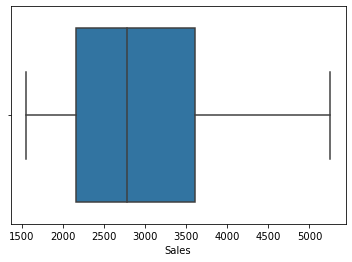

In [5]:
# Boxplot for ever
sns.boxplot("Sales",data=df)

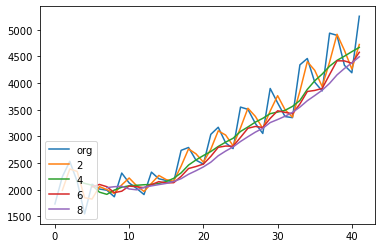

In [6]:

df.Sales.plot(label="org")
for i in range(2,10,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

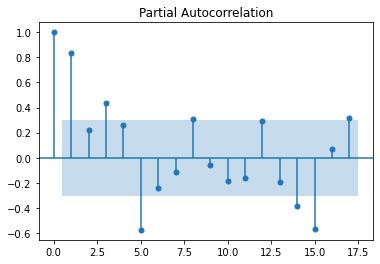

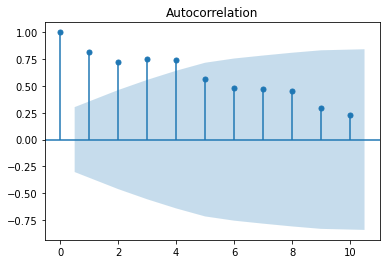

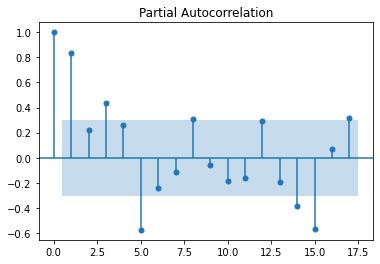

In [7]:
 
tsa_plots.plot_acf(df.Sales,lags=10)
tsa_plots.plot_pacf(df.Sales)

In [73]:
Train = df.head(42)
Test =df.tail(12)

In [74]:
Train

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [75]:
Test

,Quarter,Sales
30,Q3_93,3629.0
31,Q4_93,3373.0
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0


In [76]:
def RMSE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [77]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_ses,Test.Sales)

9.68200492651463

In [78]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hw,Test.Sales)

11.025182440957998

In [79]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_add_add,Test.Sales)

3.245837019668915

In [80]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_mul_add,Test.Sales)

2.8845556504947196

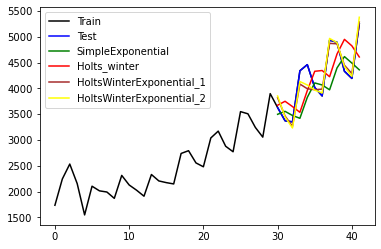

In [81]:
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

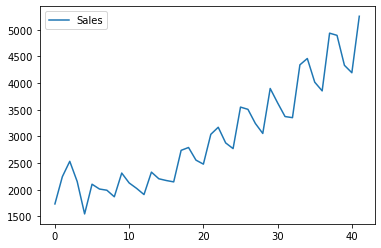

In [82]:
df.plot()
plt.show()

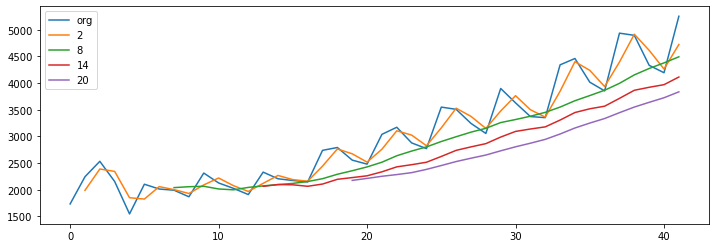

In [83]:
plt.figure(figsize = (12,4))
df['Sales'].plot(label = 'org')
for i in range(2, 24, 6):
    df['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')

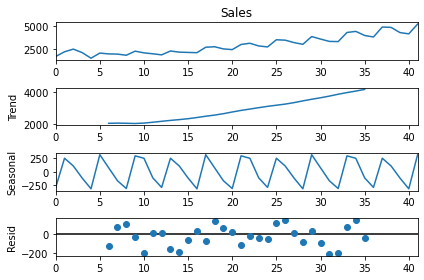

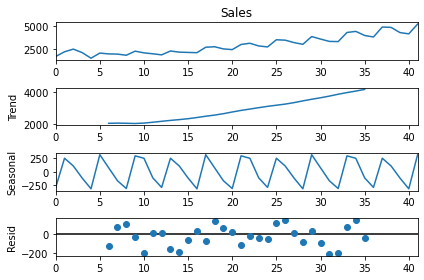

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df['Sales'], period = 12)
decompose_ts_add.plot()